In [225]:
import pandas as pd
import spacy
import matplotlib.pyplot as plt
import seaborn as sns

In [188]:
data = pd.read_json('Datasets/AMAZON_FASHION_5.json',lines=True )
data.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,5,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,"{'Size:': ' Big Boys', 'Color:': ' Blue/Orange'}",Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN
1,5,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,"{'Size:': ' Big Boys', 'Color:': ' Black (3746...",Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN
2,5,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,"{'Size:': ' Big Boys', 'Color:': ' Blue/Gray L...",Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN
3,5,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,"{'Size:': ' Big Boys', 'Color:': ' Blue (37867...",Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN
4,5,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,"{'Size:': ' Big Boys', 'Color:': ' Blue/Pink'}",Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN


In [6]:
data.shape

(3176, 12)

In [7]:
data.dtypes

overall             int64
verified             bool
reviewTime         object
reviewerID         object
asin               object
style              object
reviewerName       object
reviewText         object
summary            object
unixReviewTime      int64
vote              float64
image              object
dtype: object

In [75]:
data.isna().sum()

overall              0
verified             0
reviewTime           0
reviewerID           0
asin                 0
style               69
reviewerName         0
reviewText          16
summary              0
unixReviewTime       0
vote              2879
image             3070
dtype: int64

In [189]:
del data['image']

In [190]:
del data['vote']

In [93]:
data.isna().sum()

overall            0
verified           0
reviewTime         0
reviewerID         0
asin               0
style             69
reviewerName       0
reviewText        16
summary            0
unixReviewTime     0
dtype: int64

In [191]:
del data['style']

In [95]:
is_NaN = data.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = data[row_has_NaN]

rows_with_NaN

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime
172,5,True,"04 7, 2018",A1CKPC88NHMYGR,B001IKJOLW,Cynthia Foyer,NaN,Five Stars,1523059200
285,5,True,"07 18, 2017",AN5PL4KUZS35E,B001IKJOLW,Dilly Anderson,NaN,Five Stars,1500336000
535,5,True,"04 7, 2018",A1CKPC88NHMYGR,B0058YEJ5K,Cynthia Foyer,NaN,Five Stars,1523059200
648,5,True,"07 18, 2017",AN5PL4KUZS35E,B0058YEJ5K,Dilly Anderson,NaN,Five Stars,1500336000
890,5,True,"04 7, 2018",A1CKPC88NHMYGR,B0014F7B98,Cynthia Foyer,NaN,Five Stars,1523059200
1003,5,True,"07 18, 2017",AN5PL4KUZS35E,B0014F7B98,Dilly Anderson,NaN,Five Stars,1500336000
1258,5,True,"04 7, 2018",A1CKPC88NHMYGR,B009MA34NY,Cynthia Foyer,NaN,Five Stars,1523059200
1371,5,True,"07 18, 2017",AN5PL4KUZS35E,B009MA34NY,Dilly Anderson,NaN,Five Stars,1500336000
1628,5,True,"04 7, 2018",A1CKPC88NHMYGR,B0092UF54A,Cynthia Foyer,NaN,Five Stars,1523059200
1740,5,True,"07 18, 2017",AN5PL4KUZS35E,B0092UF54A,Dilly Anderson,NaN,Five Stars,1500336000


In [192]:
data.fillna(value='',inplace=True)

In [97]:
data.isna().sum()

overall           0
verified          0
reviewTime        0
reviewerID        0
asin              0
reviewerName      0
reviewText        0
summary           0
unixReviewTime    0
dtype: int64

In [145]:
data[data['reviewText']=='']

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime
172,5,True,"04 7, 2018",A1CKPC88NHMYGR,B001IKJOLW,Cynthia Foyer,,Five Stars,1523059200
285,5,True,"07 18, 2017",AN5PL4KUZS35E,B001IKJOLW,Dilly Anderson,,Five Stars,1500336000
535,5,True,"04 7, 2018",A1CKPC88NHMYGR,B0058YEJ5K,Cynthia Foyer,,Five Stars,1523059200
648,5,True,"07 18, 2017",AN5PL4KUZS35E,B0058YEJ5K,Dilly Anderson,,Five Stars,1500336000
890,5,True,"04 7, 2018",A1CKPC88NHMYGR,B0014F7B98,Cynthia Foyer,,Five Stars,1523059200
1003,5,True,"07 18, 2017",AN5PL4KUZS35E,B0014F7B98,Dilly Anderson,,Five Stars,1500336000
1258,5,True,"04 7, 2018",A1CKPC88NHMYGR,B009MA34NY,Cynthia Foyer,,Five Stars,1523059200
1371,5,True,"07 18, 2017",AN5PL4KUZS35E,B009MA34NY,Dilly Anderson,,Five Stars,1500336000
1628,5,True,"04 7, 2018",A1CKPC88NHMYGR,B0092UF54A,Cynthia Foyer,,Five Stars,1523059200
1740,5,True,"07 18, 2017",AN5PL4KUZS35E,B0092UF54A,Dilly Anderson,,Five Stars,1500336000


In [193]:
data['review'] = data['reviewText']+' ' +data['summary']

In [100]:
data.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,review
0,5,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,Tonya B.,Great product and price!,Five Stars,1441324800,Great product and price! Five Stars
1,5,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,Tonya B.,Great product and price!,Five Stars,1441324800,Great product and price! Five Stars
2,5,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,Tonya B.,Great product and price!,Five Stars,1441324800,Great product and price! Five Stars
3,5,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,Tonya B.,Great product and price!,Five Stars,1441324800,Great product and price! Five Stars
4,5,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,Tonya B.,Great product and price!,Five Stars,1441324800,Great product and price! Five Stars


In [101]:
data.isna().sum()

overall           0
verified          0
reviewTime        0
reviewerID        0
asin              0
reviewerName      0
reviewText        0
summary           0
unixReviewTime    0
review            0
dtype: int64

In [157]:
data.shape

(3176, 10)

In [194]:
#“asin”, “reviewerName”,”unixReviewTime”.

# drop rows which have same asin
# reviewerName and unixReviewTime and keep latest entry
data.drop_duplicates(
  subset = ['reviewerName', 'reviewerID','unixReviewTime','asin'],
  keep = 'last',inplace=True)
  
    
data.shape

(3065, 10)

In [160]:
data.head(20)

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,review
4,5,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,Tonya B.,Great product and price!,Five Stars,1441324800,Great product and price! Five Stars
9,3,True,"05 6, 2015",A3W11493KS6Z2L,B000K2PJ4K,NaeNae,Waaay too small. Will use for future child.,Oops!,1430870400,Waaay too small. Will use for future child. Oops!
10,2,True,"01 25, 2018",A3HX4X3TIABWOV,B000KPIHQ4,Denise A. Conte,Relieved my Plantar Fascitis for 3 Days. Then ...,These were recommended by my Podiatrist,1516838400,Relieved my Plantar Fascitis for 3 Days. Then ...
11,2,True,"01 5, 2017",AW8UBYMNJ894V,B000KPIHQ4,Cognizant Consumer,This is my 6th pair and they are the best thin...,Not the same as all my other pairs.,1483574400,This is my 6th pair and they are the best thin...
12,5,True,"10 17, 2016",A265UZVOZWTTXQ,B000KPIHQ4,William_Jasper,We have used these inserts for years. They pr...,Great inserts,1476662400,We have used these inserts for years. They pr...
13,5,True,"08 22, 2016",AW8UBYMNJ894V,B000KPIHQ4,Cognizant Consumer,Pinnacle seems to have more cushioning so my h...,Personal favorite,1471824000,Pinnacle seems to have more cushioning so my h...
14,5,True,"03 23, 2016",A265UZVOZWTTXQ,B000KPIHQ4,William_Jasper,Excellent insole with good support.,Five Stars,1458691200,Excellent insole with good support. Five Stars
15,5,True,"06 24, 2015",AW8UBYMNJ894V,B000KPIHQ4,Cognizant Consumer,A little more cushion than the Powerstep Prote...,Great comfort!,1435104000,A little more cushion than the Powerstep Prote...
16,5,True,"11 17, 2014",A265UZVOZWTTXQ,B000KPIHQ4,William_Jasper,These insoles help my heels feel much better. ...,These insoles help my heel feels much better. ...,1416182400,These insoles help my heels feel much better. ...
17,2,True,"01 25, 2018",A3HX4X3TIABWOV,B000V0IBDM,Denise A. Conte,Relieved my Plantar Fascitis for 3 Days. Then ...,These were recommended by my Podiatrist,1516838400,Relieved my Plantar Fascitis for 3 Days. Then ...


In [195]:
data.reset_index(inplace=True)

In [196]:
data.head()

,index,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,review
0,4,5,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,Tonya B.,Great product and price!,Five Stars,1441324800,Great product and price! Five Stars
1,9,3,True,"05 6, 2015",A3W11493KS6Z2L,B000K2PJ4K,NaeNae,Waaay too small. Will use for future child.,Oops!,1430870400,Waaay too small. Will use for future child. Oops!
2,10,2,True,"01 25, 2018",A3HX4X3TIABWOV,B000KPIHQ4,Denise A. Conte,Relieved my Plantar Fascitis for 3 Days. Then ...,These were recommended by my Podiatrist,1516838400,Relieved my Plantar Fascitis for 3 Days. Then ...
3,11,2,True,"01 5, 2017",AW8UBYMNJ894V,B000KPIHQ4,Cognizant Consumer,This is my 6th pair and they are the best thin...,Not the same as all my other pairs.,1483574400,This is my 6th pair and they are the best thin...
4,12,5,True,"10 17, 2016",A265UZVOZWTTXQ,B000KPIHQ4,William_Jasper,We have used these inserts for years. They pr...,Great inserts,1476662400,We have used these inserts for years. They pr...


In [197]:
original_data = data

In [199]:
data = original_data[['asin','reviewerID','review']]
data.head()

,asin,reviewerID,review
0,B000K2PJ4K,ALJ66O1Y6SLHA,Great product and price! Five Stars
1,B000K2PJ4K,A3W11493KS6Z2L,Waaay too small. Will use for future child. Oops!
2,B000KPIHQ4,A3HX4X3TIABWOV,Relieved my Plantar Fascitis for 3 Days. Then ...
3,B000KPIHQ4,AW8UBYMNJ894V,This is my 6th pair and they are the best thin...
4,B000KPIHQ4,A265UZVOZWTTXQ,We have used these inserts for years. They pr...


In [200]:
reviews = data['review']

In [201]:
reviews = [Text.strip() for Text in data.review] # remove both the leading and the trailing characters
reviews = [Text for Text in reviews if Text] # removes empty strings, because they are considered in Python as False
reviews[0:10]

['Great product and price! Five Stars',
 'Waaay too small. Will use for future child. Oops!',
 'Relieved my Plantar Fascitis for 3 Days. Then the unbearable pain returned in full force. These were recommended by my Podiatrist. These were recommended by my Podiatrist',
 'This is my 6th pair and they are the best thing ever for my plantar fasciitis and resultant neuromas. Unfortunately, the ones I ordered from SmartDestination must be seconds as they kill my feet. The hard plastic insert rubs on the outside edges of my feet. I am unable to exchange them as I waited one day too late to use them in my walking shoes. Not the same as all my other pairs.',
 'We have used these inserts for years.  They provide great support. Great inserts',
 'Pinnacle seems to have more cushioning so my husband likes them better. He\'s tried all the other Powerstep inserts as well as other brands. This is his must have insert. He is 6\'3" and weighs 257lbs with bone spurs (plantar fasciitis) and a high instep.

In [202]:
# Remove Punctuations 
import string

no_punc_text = []
for i in range(0,len(reviews)):
    txt = reviews[i].translate(str.maketrans('','',string.punctuation))
    no_punc_text.append(txt)
no_punc_text[0]

'Great product and price Five Stars'

In [203]:
from nltk.tokenize import word_tokenize

text_tokens = []
for i in range(0,len(no_punc_text)):
    txt = word_tokenize(no_punc_text[i])
    text_tokens.append(txt)

text_tokens[0]

['Great', 'product', 'and', 'price', 'Five', 'Stars']

In [204]:

# Remove Stopwords
from nltk.corpus import stopwords

my_stop_words=stopwords.words('english')

no_stop_tokens = []

for i in range(0,len(text_tokens)):
    txt = [word for word in text_tokens[i] if not word in my_stop_words]
    no_stop_tokens.append(txt)
    
no_stop_tokens[0]

['Great', 'product', 'price', 'Five', 'Stars']

In [205]:
# Normalize the data
lower_words = []
for i in range(0,len(no_stop_tokens)):
    txt = [Text.lower() for Text in no_stop_tokens[i]]
    lower_words.append(txt)
    
lower_words[0]

['great', 'product', 'price', 'five', 'stars']

In [206]:
# Lemmatization
nlp=spacy.load('en_core_web_sm')

lemmas = []
for i in range(0,len(lower_words)):
    doc=nlp(' '.join(lower_words[i]))
    lm = [token.lemma_ for token in doc]
    lemmas.append(lm)
    

lemmas[0],lemmas[1]

(['great', 'product', 'price', 'five', 'star'],
 ['waaay', 'small', 'will', 'use', 'future', 'child', 'oop'])

In [207]:
clean_tweets = []
for i in range(0,len(lemmas)):
    txt = ' '.join(lemmas[i])
    clean_tweets.append(txt)
clean_tweets[0],clean_tweets[1]    

('great product price five star', 'waaay small will use future child oop')

In [208]:
import warnings
warnings.filterwarnings('ignore')

In [209]:
data ['clean_reviews'] = clean_tweets
data.head()

,asin,reviewerID,review,clean_reviews
0,B000K2PJ4K,ALJ66O1Y6SLHA,Great product and price! Five Stars,great product price five star
1,B000K2PJ4K,A3W11493KS6Z2L,Waaay too small. Will use for future child. Oops!,waaay small will use future child oop
2,B000KPIHQ4,A3HX4X3TIABWOV,Relieved my Plantar Fascitis for 3 Days. Then ...,relieve plantar fascitis 3 day then unbearable...
3,B000KPIHQ4,AW8UBYMNJ894V,This is my 6th pair and they are the best thin...,this 6th pair good thing ever plantar fasciiti...
4,B000KPIHQ4,A265UZVOZWTTXQ,We have used these inserts for years. They pr...,we use insert year they provide great support ...


### Emotion Mining - Sentiment Analysis

In [210]:
affin = pd.read_csv('Datasets/affin.csv')
print(affin.shape)
affin.head()

(2477, 2)


,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [211]:
affinity_scores=affin.set_index('word')['value'].to_dict()

In [212]:
# Custom function: score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

In [213]:
def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [214]:
# manual testing
calculate_sentiment(text='awesome day')

4

In [215]:
calculate_sentiment(text='bad')

-3

In [216]:
# Calculating sentiment value for each sentence
data['sentiment_value']=data['clean_reviews'].apply(calculate_sentiment)
data['sentiment_value']

0        3
1        0
2        3
3       -1
4        8
        ..
3060     4
3061     4
3062     7
3063    16
3064     0
Name: sentiment_value, Length: 3065, dtype: int64

In [217]:
data.sort_values(by='sentiment_value')

,asin,reviewerID,review,clean_reviews,sentiment_value
52,B000YFSR4W,A21HH0VIBKK80J,"Was terribly disappointed, the pants were way ...",be terribly disappointed pant way large leg hu...,-8
32,B000YFSR5G,A21HH0VIBKK80J,"Was terribly disappointed, the pants were way ...",be terribly disappointed pant way large leg hu...,-8
3017,B001LNSY2Q,A21HH0VIBKK80J,"Was terribly disappointed, the pants were way ...",be terribly disappointed pant way large leg hu...,-8
194,B001IKJOLW,A9KR8PT0Z47CL,They're ugly: the toe is rounded and the mater...,they re ugly toe round material weird nike wom...,-5
906,B0014F7B98,A9KR8PT0Z47CL,They're ugly: the toe is rounded and the mater...,they re ugly toe round material weird nike wom...,-5
...,...,...,...,...,...
487,B0058YEJ5K,AC5PPX3XLCZN1,Glad I read the reviews and ordered a half siz...,glad I read review order half size big these l...,35
839,B0014F7B98,AC5PPX3XLCZN1,Glad I read the reviews and ordered a half siz...,glad I read review order half size big these l...,35
2706,B014IBJKNO,AC5PPX3XLCZN1,Glad I read the reviews and ordered a half siz...,glad I read review order half size big these l...,35
127,B001IKJOLW,AC5PPX3XLCZN1,Glad I read the reviews and ordered a half siz...,glad I read review order half size big these l...,35


In [218]:
# Sentiment score of the whole review
data['sentiment_value'].describe()

count    3065.000000
mean        6.522349
std         5.582888
min        -8.000000
25%         3.000000
50%         5.000000
75%        10.000000
max        35.000000
Name: sentiment_value, dtype: float64

In [219]:
# negative sentiment score of the whole review
data[data['sentiment_value']<=0]

,asin,reviewerID,review,clean_reviews,sentiment_value
1,B000K2PJ4K,A3W11493KS6Z2L,Waaay too small. Will use for future child. Oops!,waaay small will use future child oop,0
3,B000KPIHQ4,AW8UBYMNJ894V,This is my 6th pair and they are the best thin...,this 6th pair good thing ever plantar fasciiti...,-1
10,B000V0IBDM,AW8UBYMNJ894V,This is my 6th pair and they are the best thin...,this 6th pair good thing ever plantar fasciiti...,-1
26,B000YFSR5G,A3T8NHQYBQSV1X,I only give four stars because the pants have ...,I give four star pant pocket four star,0
27,B000YFSR5G,A1G0HYMR02WM2W,Average product. As described. Three Stars,average product as describe three star,0
...,...,...,...,...,...
3033,B0014F7B98,A135SGOQMVWABQ,"I wear these everyday to work, the gym, etc. F...",I wear everyday work gym etc five star,0
3039,B0014F7B98,A2BM6XH033ZQ3I,The shoe is too large. When you do lunges it h...,the shoe large when lunge hurt heel the shoe s...,-1
3046,B009MA34NY,A135SGOQMVWABQ,"I wear these everyday to work, the gym, etc. F...",I wear everyday work gym etc five star,0
3056,B0092UF54A,A135SGOQMVWABQ,"I wear these everyday to work, the gym, etc. F...",I wear everyday work gym etc five star,0


In [220]:
# positive sentiment score of the whole review
data[data['sentiment_value']>0]

,asin,reviewerID,review,clean_reviews,sentiment_value
0,B000K2PJ4K,ALJ66O1Y6SLHA,Great product and price! Five Stars,great product price five star,3
2,B000KPIHQ4,A3HX4X3TIABWOV,Relieved my Plantar Fascitis for 3 Days. Then ...,relieve plantar fascitis 3 day then unbearable...,3
4,B000KPIHQ4,A265UZVOZWTTXQ,We have used these inserts for years. They pr...,we use insert year they provide great support ...,8
5,B000KPIHQ4,AW8UBYMNJ894V,Pinnacle seems to have more cushioning so my h...,pinnacle seem cushion husband like well he s t...,3
6,B000KPIHQ4,A265UZVOZWTTXQ,Excellent insole with good support. Five Stars,excellent insole good support five star,8
...,...,...,...,...,...
3059,B005AGO4LU,A1DHIMM5SZGIIL,I absolutely LOVE these shoes. These are my ab...,I absolutely love shoe these absolute favorite...,14
3060,B005AGO4LU,A2077NII5H62R2,Perfect fit! Five Stars,perfect fit five star,4
3061,B005AGO4LU,A2IBS6PIPAGAB5,My favorite cross trainers! Comfortable,my favorite cross trainer comfortable,4
3062,B005AGO4LU,A1GTC5EVSJNCQ8,Love them fit perfect Five Stars,love fit perfect five star,7


In [222]:
# how many words are there in a sentence?
data['word_count']=data['clean_reviews'].str.split().apply(len)
data['word_count']

0        5
1        7
2       17
3       40
4       10
        ..
3060     4
3061     5
3062     5
3063    46
3064     8
Name: word_count, Length: 3065, dtype: int64

In [223]:
# Adding index cloumn
data['index']=range(0,len(data))
data.head()

,asin,reviewerID,review,clean_reviews,sentiment_value,word_count,index
0,B000K2PJ4K,ALJ66O1Y6SLHA,Great product and price! Five Stars,great product price five star,3,5,0
1,B000K2PJ4K,A3W11493KS6Z2L,Waaay too small. Will use for future child. Oops!,waaay small will use future child oop,0,7,1
2,B000KPIHQ4,A3HX4X3TIABWOV,Relieved my Plantar Fascitis for 3 Days. Then ...,relieve plantar fascitis 3 day then unbearable...,3,17,2
3,B000KPIHQ4,AW8UBYMNJ894V,This is my 6th pair and they are the best thin...,this 6th pair good thing ever plantar fasciiti...,-1,40,3
4,B000KPIHQ4,A265UZVOZWTTXQ,We have used these inserts for years. They pr...,we use insert year they provide great support ...,8,10,4


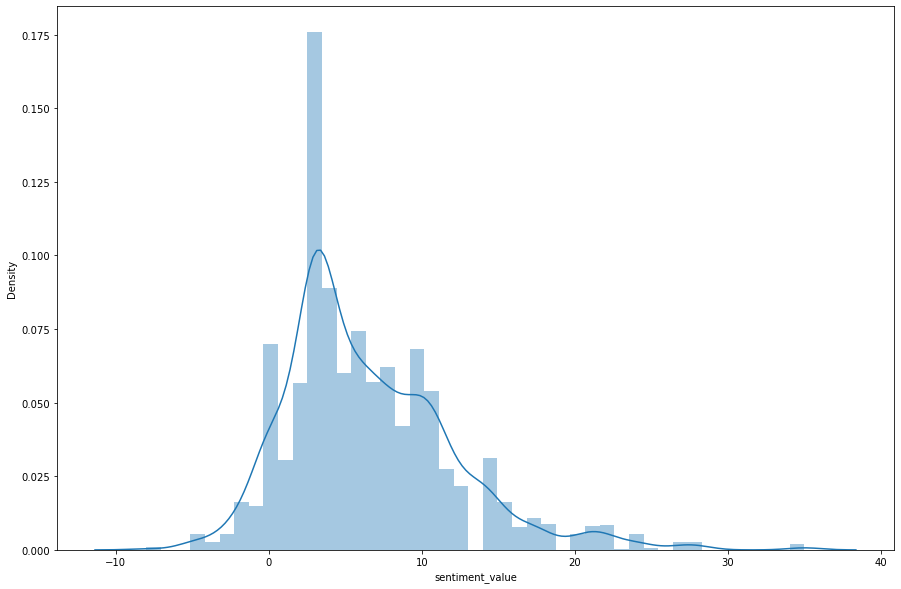

In [226]:
# Plotting the sentiment value for whole review
plt.figure(figsize=(15,10))
sns.distplot(data['sentiment_value'])
plt.show()

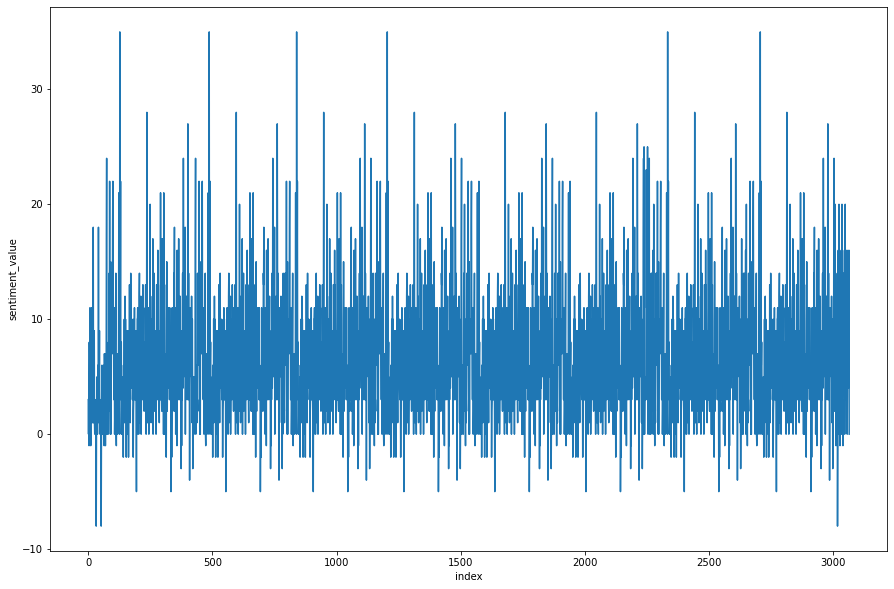

In [228]:
# Plotting the line plot for sentiment value of whole review
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=data)
plt.show()

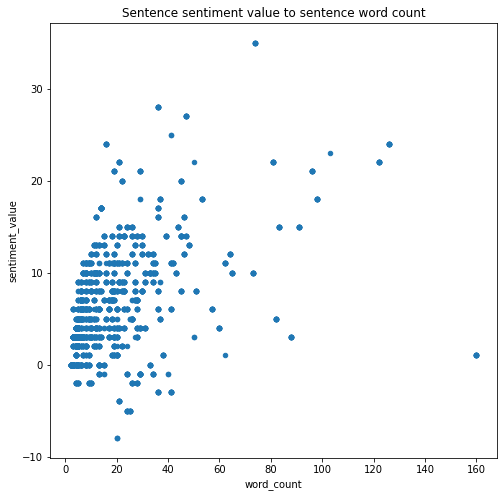

In [230]:
# Correlation analysis
data.plot.scatter(x='word_count',y='sentiment_value',figsize=(8,8),title='Sentence sentiment value to sentence word count')
plt.show()